In [1]:
import tensorflow as tf
import numpy as np

In [2]:
print(tf.__version__)

2.4.0


In [3]:
rand = tf.random.uniform([2, 2], 1, 5)
print(rand)

tf.Tensor(
[[1.7049127 4.6693645]
 [3.7619228 4.62151  ]], shape=(2, 2), dtype=float32)


In [4]:
rand = tf.random.normal([2, 2], 1, 5)
print(rand)


tf.Tensor(
[[ 3.336511   4.2398186]
 [ 0.3427208 -6.3813066]], shape=(2, 2), dtype=float32)


- 입력(x)
- 출력(y)
- 가충치(w)
- 편향(b)
- 활성화 함수(a)

## AND

In [5]:
def sigmoid(x):
  return (1 / (1 + np.exp(-x)))

In [9]:
x = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [0], [0], [1]])
w = tf.random.normal([2], 0, 1)
b = tf.random.normal([1], 0, 1)
b_x = 1

for i in range(2000):
  error_sum = 0
  for j in range(4):
    output = sigmoid((np.sum(x[j] * w)) + b_x + b)
    error = y[j][0] - output # 원하는 결과 - output
    w = w + x[j] * 0.1 * error
    b = b + b_x * 0.1 * error
    error_sum += error
  if i % 400 == 0:
    print(f"{i}\tError{error_sum}")
  
print(w)
print(b)

0	Error[-1.3803649]
400	Error[-0.06779753]
800	Error[-0.03672346]
1200	Error[-0.0250216]
1600	Error[-0.01892237]
tf.Tensor([6.966196  6.9630375], shape=(2,), dtype=float32)
tf.Tensor([-11.614841], shape=(1,), dtype=float32)


In [8]:
for i in range(4):
  print(f"X : {x[i]}, Y : {y[i]}, output = {sigmoid(np.sum(x[i]*w+b))}")

X : [0 0], Y : [0], output = 7.746901100135094e-11
X : [0 1], Y : [0], output = 8.3289654850169e-08
X : [1 0], Y : [0], output = 8.35509208188759e-08
X : [1 1], Y : [1], output = 8.982063765986364e-05


## OR

In [14]:
x = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [1]])
w = tf.random.normal([2], 0, 1)
b = tf.random.normal([1], 0, 1)
b_x = 1

for i in range(2000):
  error_sum = 0
  for j in range(4):
    output = sigmoid(np.sum(x[j]*w) + b_x + b)
    error = y[j][0] - output
    b = w + x[j] * 0.1 * error
    b = b + b_x * 0.1 * error
    error_sum += error
    if i % 400 == 0:
      print(f"{i}\tError{error_sum}")

print(w)
print(b)

0	Error[-0.7206421]


ValueError: ignored

In [15]:
for i in range(4):
  print(f"X: {x[i]}, Y: {y[i]}, output: {sigmoid(np.sum(x[i]*w+b))}")

X: [0 0], Y: [0], output: 0.1660697589724028
X: [0 1], Y: [1], output: 0.20194614013998177
X: [1 0], Y: [1], output: 0.027245087093774923
X: [1 1], Y: [1], output: 0.03436683089008393


## XOR

In [17]:
x = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])
w = np.random.normal([2], 0, 1)
b = np.random.normal([1], 0, 1)

for i in range(2000):
  for j in range(4):
    output = sigmoid(np.sum(x[j]*w) + b_x + b)
    error = y[j][0] - output
    w = w + x[j] * 0.1 * error
    b = b + b_x * 0.1 * error
    error_sum += error
  if i % 400 == 0:
    print(f"{i}\t Error{error_sum}")

print(w)
print(b)

0	 Error[-2.5595784]
400	 Error[-20.221642]
800	 Error[-20.207933]
1200	 Error[-20.207933]
1600	 Error[-20.207933]
[-0.10256353 -0.05128176]
[-0.94871824]


In [18]:
for i in range(4):
  print(f"X: {x[i]}, Y: {y[i]}, output = {sigmoid(np.sum(x[i]*w + b))}")

X: [0 0], Y: [0], output = 0.13039889016465062
X: [0 1], Y: [1], output = 0.12469318868602926
X: [1 0], Y: [1], output = 0.11920292202211621
X: [1 1], Y: [0], output = 0.11392293029778876


## XOR (텐서플로우를 이용)

- 딥러닝
  - Layer를 구성하는게 가장 중요한 일
  - 최적의 'w', 'b'를 결정

In [23]:
# 입력과 출력
x = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])

# Layer를 설계
model = tf.keras.Sequential([
  tf.keras.layers.Dense(units = 2, activation = 'sigmoid', input_shape = (2,)),
  tf.keras.layers.Dense(units = 1, activation = 'sigmoid')
])

# 레이어를 컴파일
model.compile(optimizer = tf.keras.optimizers.SGD(lr = 0.1), loss = 'mse')

# 레이어를 확인
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 2)                 6         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 3         
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


In [24]:
history = model.fit(x, y, epochs = 2000, batch_size = 1)

Epoch 1/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.3338
Epoch 2/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.2008
Epoch 3/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.2047
Epoch 4/2000
4/4 [==============================] - 0s 4ms/step - loss: 0.2436
Epoch 5/2000
4/4 [==============================] - 0s 3ms/step - loss: 0.3506
Epoch 6/2000
4/4 [==============================] - 0s 3ms/step - loss: 0.2206
Epoch 7/2000
4/4 [==============================] - 0s 3ms/step - loss: 0.3001
Epoch 8/2000
4/4 [==============================] - 0s 3ms/step - loss: 0.2261
Epoch 9/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.3161
Epoch 10/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.2195
Epoch 11/2000
4/4 [==============================] - 0s 3ms/step - loss: 0.2670
Epoch 12/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.2718
Epoch 13/2000
4/4 [==============================

In [25]:
model.predict(x)

array([[0.10444692],
       [0.85702395],
       [0.8563617 ],
       [0.15755147]], dtype=float32)

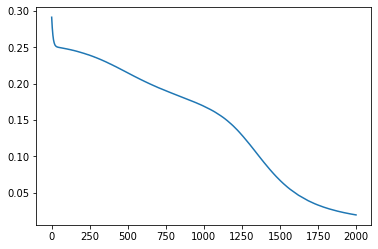

In [26]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])

In [ ]:
\